# Bufo spinosus

<b>42 samples: 21M, 21F</b>

In [1]:
%matplotlib inline  
## Allows plots to be shown inside the notebook, rather than in a separate windo.
import os
import MISC_RAD_tools as MISC  ## Custom scripts
import pprint
import subprocess
from matplotlib import pyplot as plt
import numpy as np
import SLMF_lightweight as SLMF_L

## Stacks

Stacks was run on all individuals with default parameters for Ustacks and Cstacks, as preliminary tests on this data and others showed that these provide a good balance between the quantity and quality (i.e. reliability of genotypes) in the data. 

The final Populations command was:

```
INDIR=/scratch/axiom/FAC/FBM/DEE/nperrin/rana_genome/Bufonids/Bspinosus_adult_samples/Stacks/
POPMAP=/scratch/axiom/FAC/FBM/DEE/nperrin/rana_genome/Bufonids/Bspinosus_adult_samples/Stacks/popmap.txt
UTDIR=/scratch/axiom/FAC/FBM/DEE/nperrin/rana_genome/Bufonids/Bspinosus_adult_samples/Stacks/Populations_r08_p2_m6/

populations -P $INDIR  -M $POPMAP  -b 1 -r 0.8 -p 2 --min_maf 0.05 --max_obs_het 0.75 -m 8 -t 8 --vcf -O $OUTDIR
```

### Checking per-sample data
First I will the amount of missing genotype calls per sample, in order to identify any which are low quality and can be removed. NOTE - removing low quality samples can allow more loci to pass the -r and -p filters in populations, hence retaining more data. 

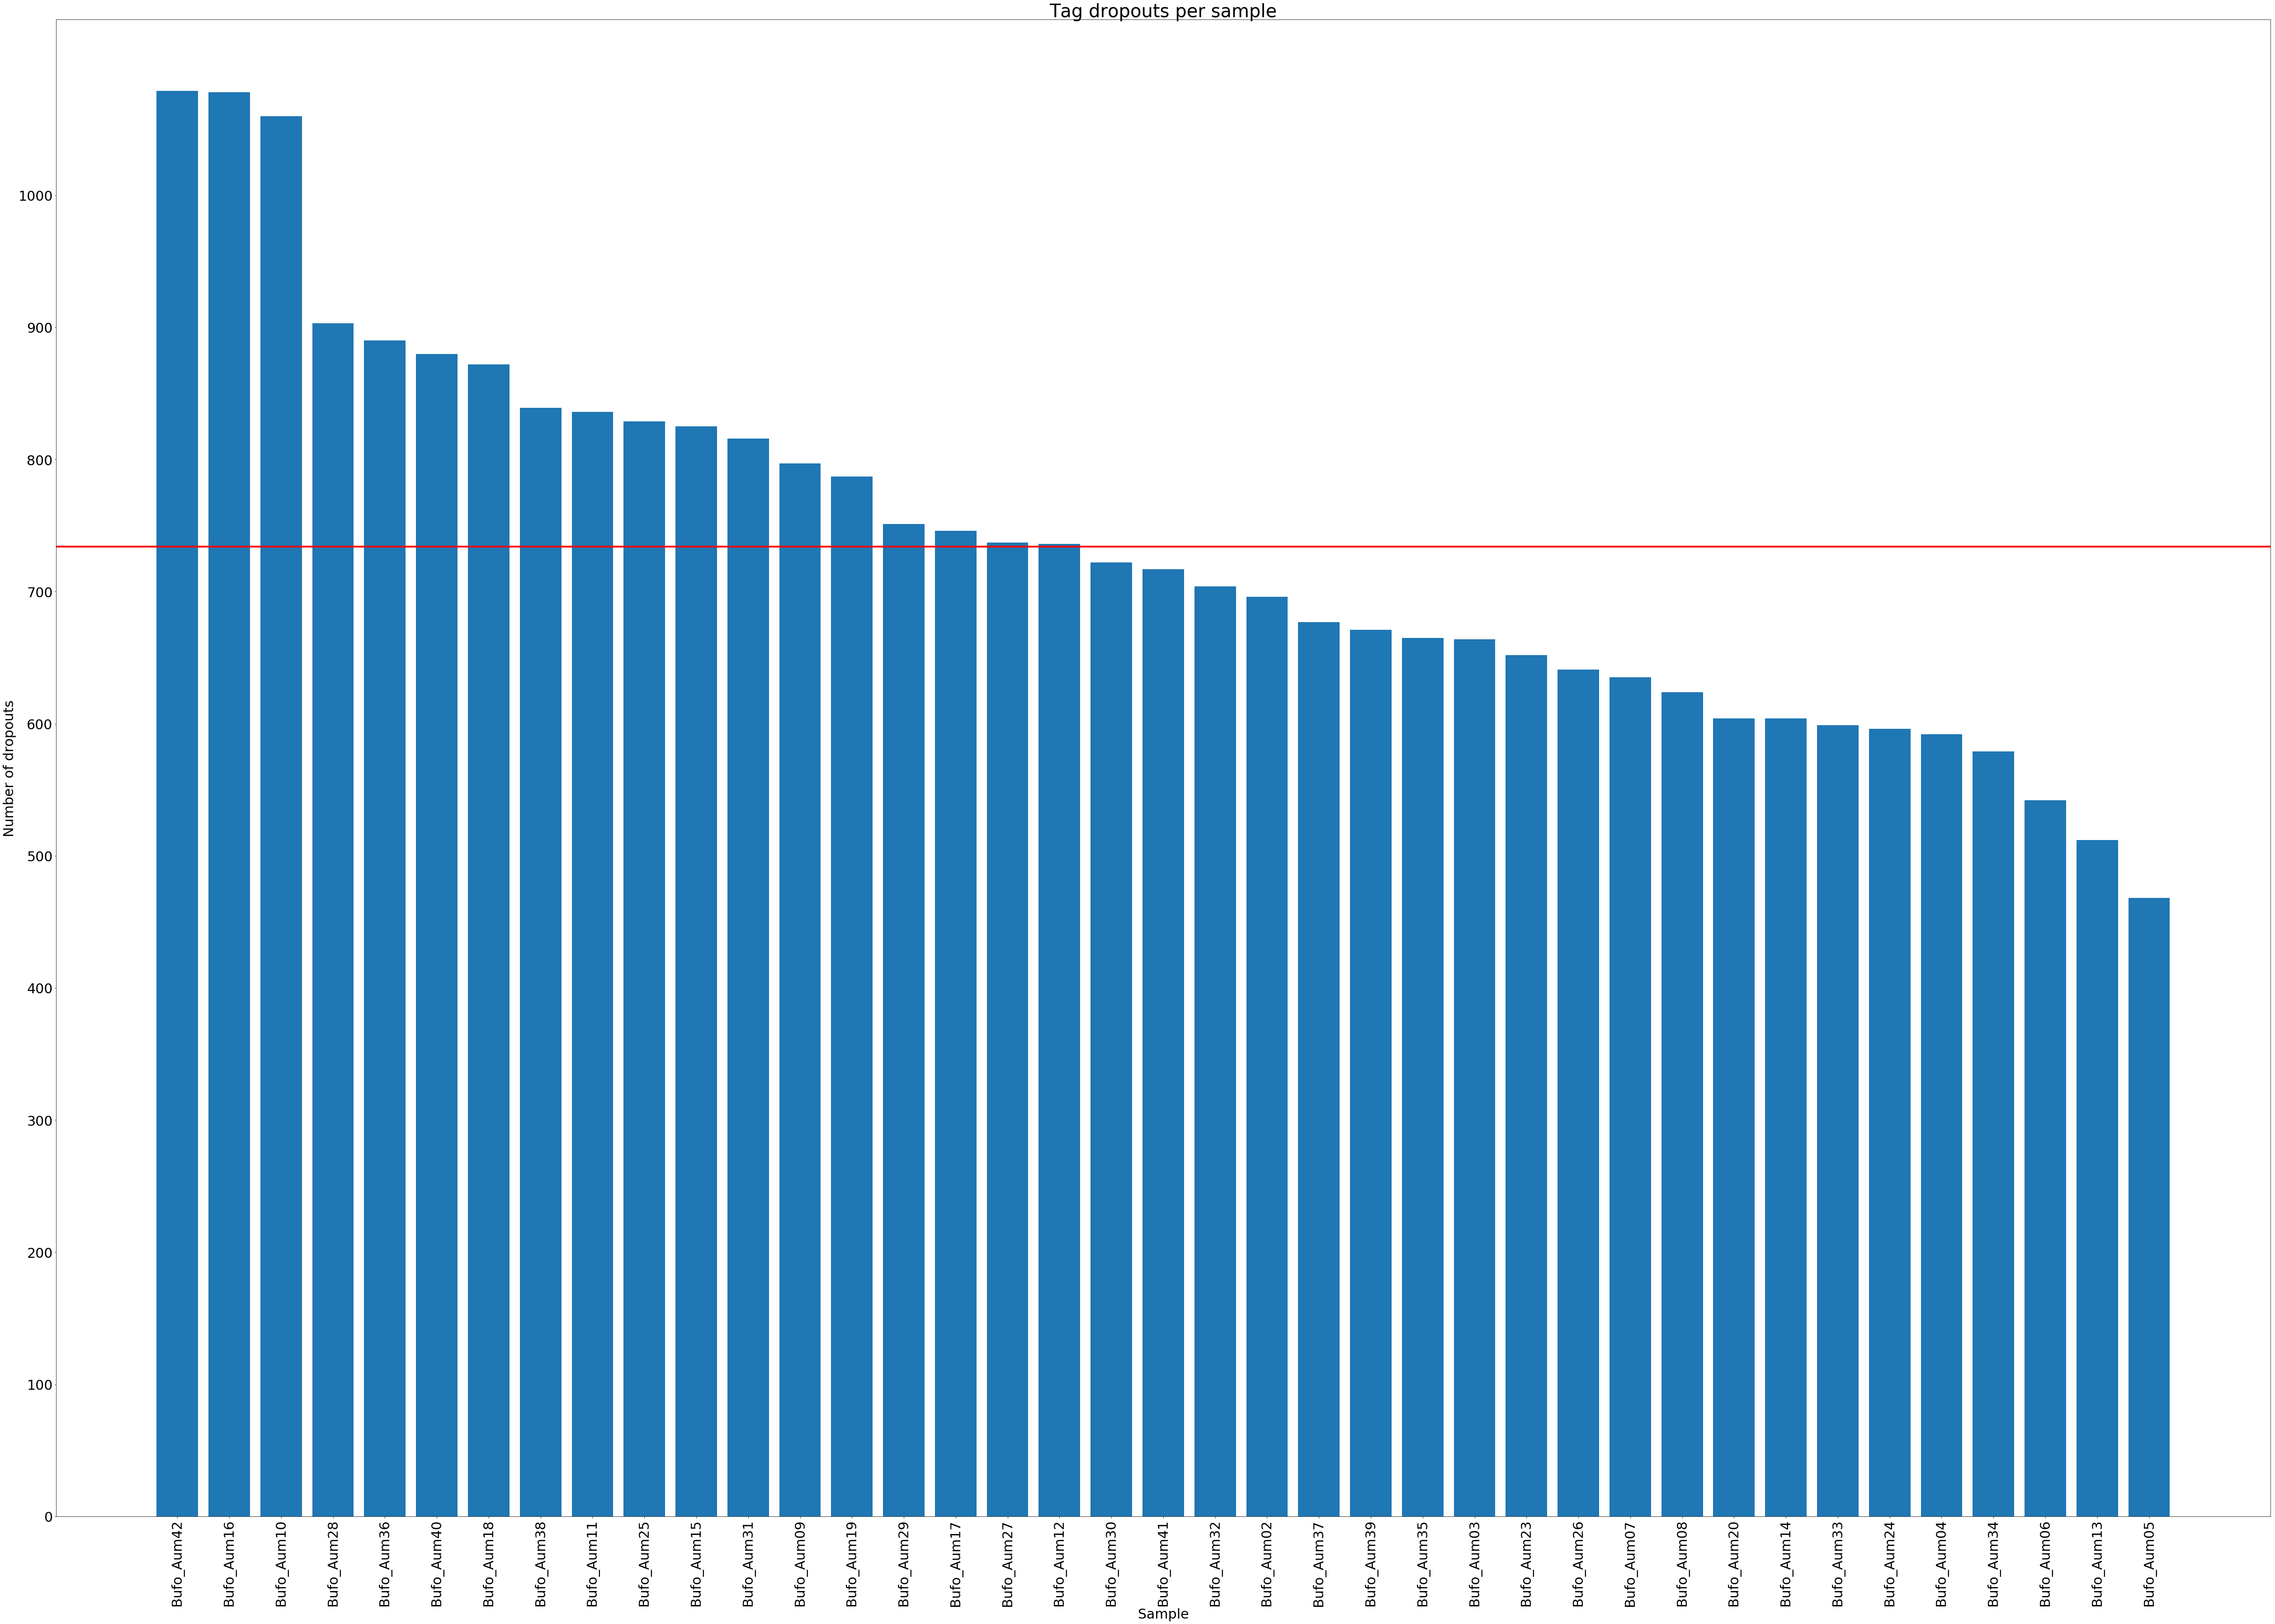

Outputs written to:
/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Tag_dropouts_per_sample.txt
/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Tag_dropouts_per_tag.txt
/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//blacklist.txt


In [5]:
wd = "/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults/"

## The function below just plots the amount of missing genotype calls for all 

blacklist = MISC.missing_data_finder("%s/batch_1.vcf" % wd, wd)

ok, all samples look good - no need to remove any. 

## Summary stats for the dataset

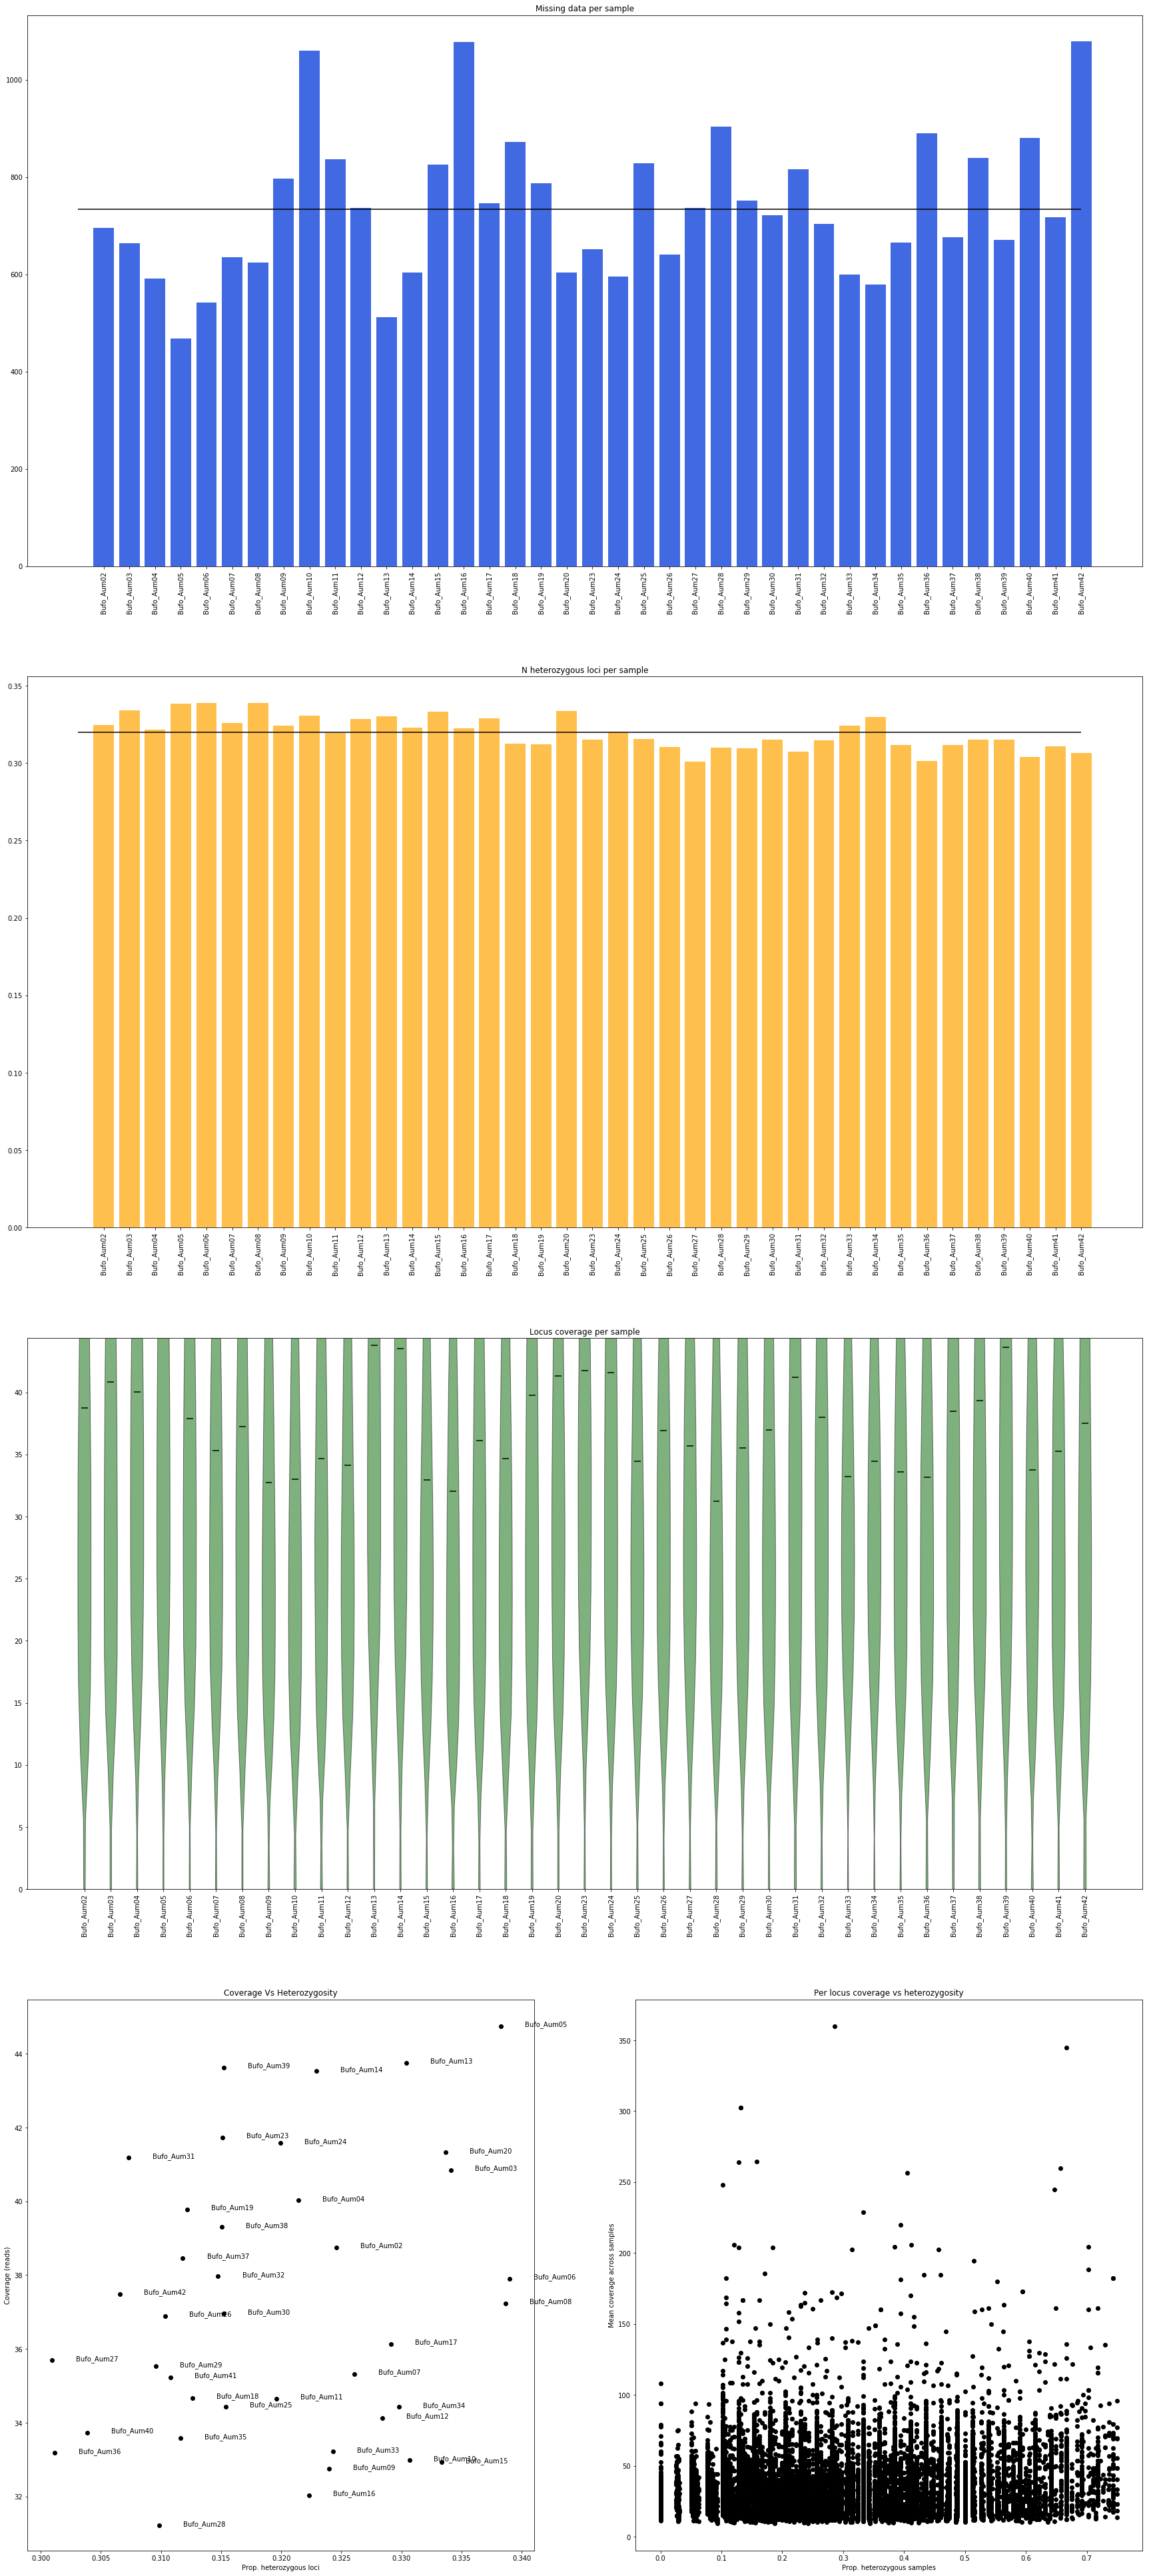

#### DONE ####

Number of Loci = 28090
Average coverage = 37.1545590638 reads


In [6]:
MISC.Summary_plotter("%s/batch_1.vcf" % wd, "1111", False)

So a nice dataset! Lets look for some sex linked loci!

# Looking for sex linked loci


## Parameter tests using permutations


The below parameter sets will be tested

|Param_set| Hom | Freq_het | Het_het | Spec |
|-----|----------|---------|------|
|1|0.7|0.3|0.5|0.5|
|2|0.7|0.325|0.6|0.6|
|3|0.7|0.35|0.7|0.7|
|4|0.7|0.4|0.8|0.8|
|5|0.7|0.425|0.9|0.9|
|6|0.7|0.45|1|1|
|7|0.8|0.3|0.5|0.5|
|8|0.8|0.325|0.6|0.6|
|9|0.8|0.35|0.7|0.7|
|10|0.8|0.4|0.8|0.8|
|11|0.8|0.425|0.9|0.9|
|12|0.8|0.45|1|1|
|13|0.9|0.3|0.5|0.5|
|14|0.9|0.325|0.6|0.6|
|15|0.9|0.35|0.7|0.7|
|16|0.9|0.4|0.8|0.8|
|17|0.9|0.425|0.9|0.9|
|18|0.9|0.45|1|1|
|19|1|0.3|0.5|0.5|
|20|1|0.325|0.6|0.6|
|21|1|0.35|0.7|0.7|
|22|1|0.4|0.8|0.8|
|23|1|0.425|0.9|0.9|
|24|1|0.45|1|1|


In [1]:
import MISC_RAD_tools_py2 as MISC2

## Making the parameter dictionaries to test

## Get the template

template_dict = MISC2.SLM_permutations("", template = True)

Hom = [0.7,0.8,0.9,1]
Freq_het = [0.3,0.325,0.35,0.4,0.425,0.45]
Het_het = [0.5,0.6,0.7,0.8,0.9,1]
Spec = [0.5,0.6,0.7,0.8,0.9,1]

working_dir = "/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults/"

Parameter_dictionaries = {}
dict_index = 1

for i in Hom:
    for j in range(0, len(Freq_het)):

        template_dict["Name"] = "Param_set_%s" % dict_index
        
        template_dict['Catalog'] = "%s/batch_1.catalog.tags.tsv.gz" % working_dir
        template_dict['Pop_map'] = "%s/Sex_ID_info.txt" % working_dir
        template_dict['VCF'] = "%s/batch_1.vcf" % working_dir


        template_dict['homogametic_REF_allele_freq'] = i 
        template_dict['X_or_Z_freq_threshold'] = Freq_het[j]
        
        template_dict['homogamtic_homozygosity_threshold'] = i  
        template_dict['heterogamtic_heterozygosity_threshold'] = Het_het[j]
        
        template_dict['sex_presence_threshold'] = Spec[j]
        

        Parameter_dictionaries["Param_set_%s" % dict_index] = template_dict.copy() ## have to use copy here for some reason!
        
        dict_index += 1
        


In [2]:
MISC.SLM_permutations(Parameter_dictionaries, Dict_template = False, N_perms = 49, threads = 7, template = False, plot = True)

('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed: 11.5min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 15.3min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations/Randomisations_Param_set_4.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed: 12.0min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 15.2min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations/Randomisations_Param_set_5.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed: 11.9min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 15.1min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations/Randomisations_Param_set_6.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed: 11.8min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 15.0min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations/Randomisations_Param_set_7.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed: 11.8min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 15.2min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations/Randomisations_Param_set_1.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed: 11.8min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 15.1min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations/Randomisations_Param_set_2.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed: 11.7min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 15.0min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations/Randomisations_Param_set_3.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed: 11.7min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 14.8min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations/Randomisations_Param_set_8.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed: 11.7min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 15.1min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations/Randomisations_Param_set_9.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed: 11.6min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 15.0min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations/Randomisations_Param_set_16.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed: 11.7min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 14.9min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations/Randomisations_Param_set_17.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed: 11.8min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 15.2min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations/Randomisations_Param_set_14.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed: 11.7min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 15.1min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations/Randomisations_Param_set_15.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed: 11.9min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 15.0min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations/Randomisations_Param_set_12.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed: 11.6min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 15.0min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations/Randomisations_Param_set_13.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed: 12.0min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 14.9min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations/Randomisations_Param_set_10.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed: 12.1min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 15.1min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations/Randomisations_Param_set_11.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed: 11.8min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 15.0min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations/Randomisations_Param_set_18.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed: 11.7min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 15.2min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations/Randomisations_Param_set_19.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed: 12.0min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 15.2min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations/Randomisations_Param_set_23.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed: 11.7min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 15.1min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations/Randomisations_Param_set_22.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed: 11.9min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 14.9min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations/Randomisations_Param_set_21.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed: 11.8min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 14.9min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations/Randomisations_Param_set_20.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed: 11.7min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 15.0min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations/Randomisations_Param_set_24.txt

Running SLM_finder for real sex assignments:
	Param_set_4
	Param_set_5
	Param_set_6
	Param_set_7
	Param_set_1
	Param_set_2
	Param_set_3
	Param_set_8
	Param_set_9
	Param_set_16
	Param_set_17
	Param_set_14
	Param_set_15
	Param_set_12
	Param_set_13
	Param_set_10
	Param_set_11
	Param_set_18
	Param_set_19
	Param_set_23
	Param_set_22
	Param_set_21
	Param_set_20
	Param_set_24

Real sex assignment results outputted to here: /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults//Randomisations/Real_sex_assignment_SLMs.txt
All done!


Figures saved here: /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults/Randomisations//Randomisation_plots.pdf


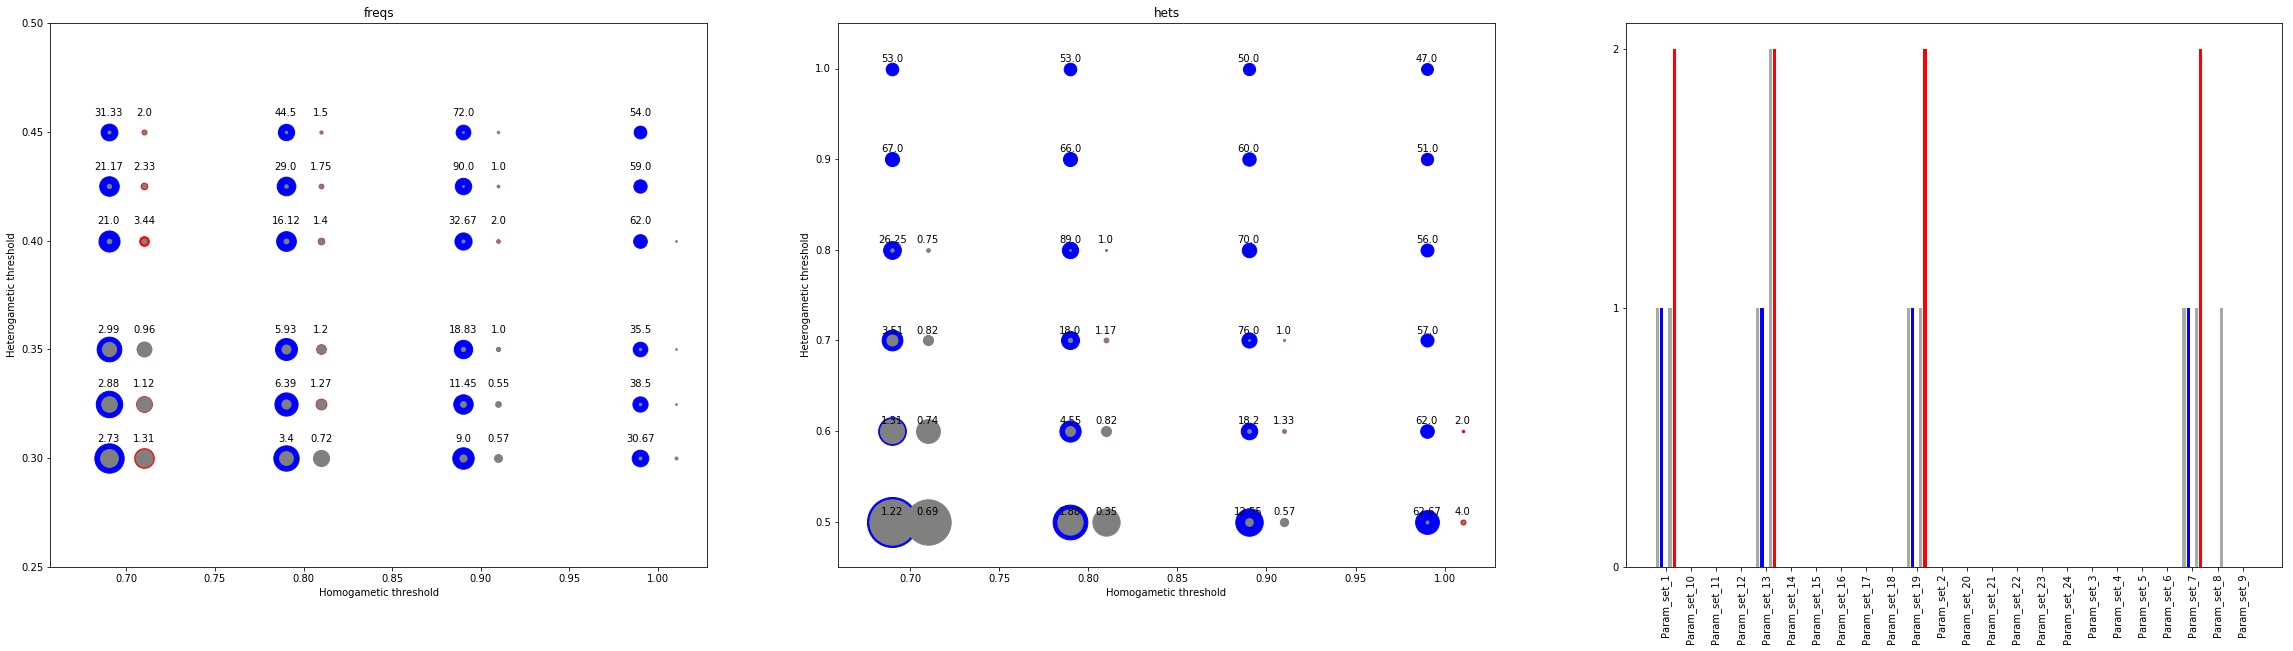

In [2]:
multiplier = 3
MISC2.Perm_plotter("/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults/Randomisations/", Parameter_dictionaries, multiplier)

## Final SLM_finder parameters

In [3]:
wd = "/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults/"


Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "%s/batch_1.catalog.tags.tsv.gz" % wd ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "%s/batch_1.vcf" % wd ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "%s/Sex_ID_info.txt" % wd ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.425  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 0.8 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.8 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.




##### Using SNP frequency approach #### 

Number of loci = 28090
Number of samples = 39
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 28089
Number of putative X linked snps = 90
Number of putative X linked tags = 90
Number of putative Z linked markers = 2
Number of putative Z linked tags = 2


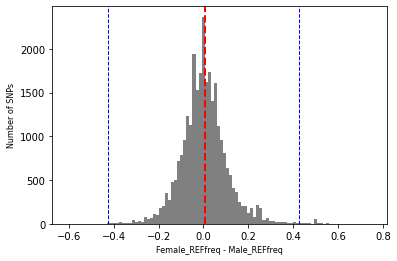


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 28090
Number of samples = 39
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 28089
Number of putative X linked snps = 89
Number of putative X linked tags = 89
Number of putative Z linked markers = 1
Number of putative Z linked tags = 1

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of females: 20
Number of males: 20
Number of Putative Y linked tags: 0
Number of Putative W linked tags: 0

 ### DONE! ###



/home/djeffrie/.local/lib/python3.6/site-packages/matplotlib_venn/_venn3.py:61: UserWarning: Circle C has zero area
  warnings.warn("Circle C has zero area")


Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults/

 ## After merging tags accross methods ## 

Final number of XY tags = 104
Final number of ZW tags = 3


In [4]:
import MISC_RAD_tools_py3 as MISC3
relaxedXYset, relaxedZWset = MISC3.Super_SLM_finder(Parameter_dict, "111")

### 104 markers in total in favour of XY! 

I will, as a last step just check that the sex assignments match with the expected genotypes at these loci. 

In [5]:
import MISC_RAD_tools_py3 as MISC3

full_vcf = "%s/batch_1.vcf" % wd
SL_outs = "Bspin_SLtags.vcf"
MISC3.filter_vcf(full_vcf, relaxedXYset, SL_outs)

Clusterplot PDF saved here: /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults/Bspin_SLtags_clusterplot.pdf


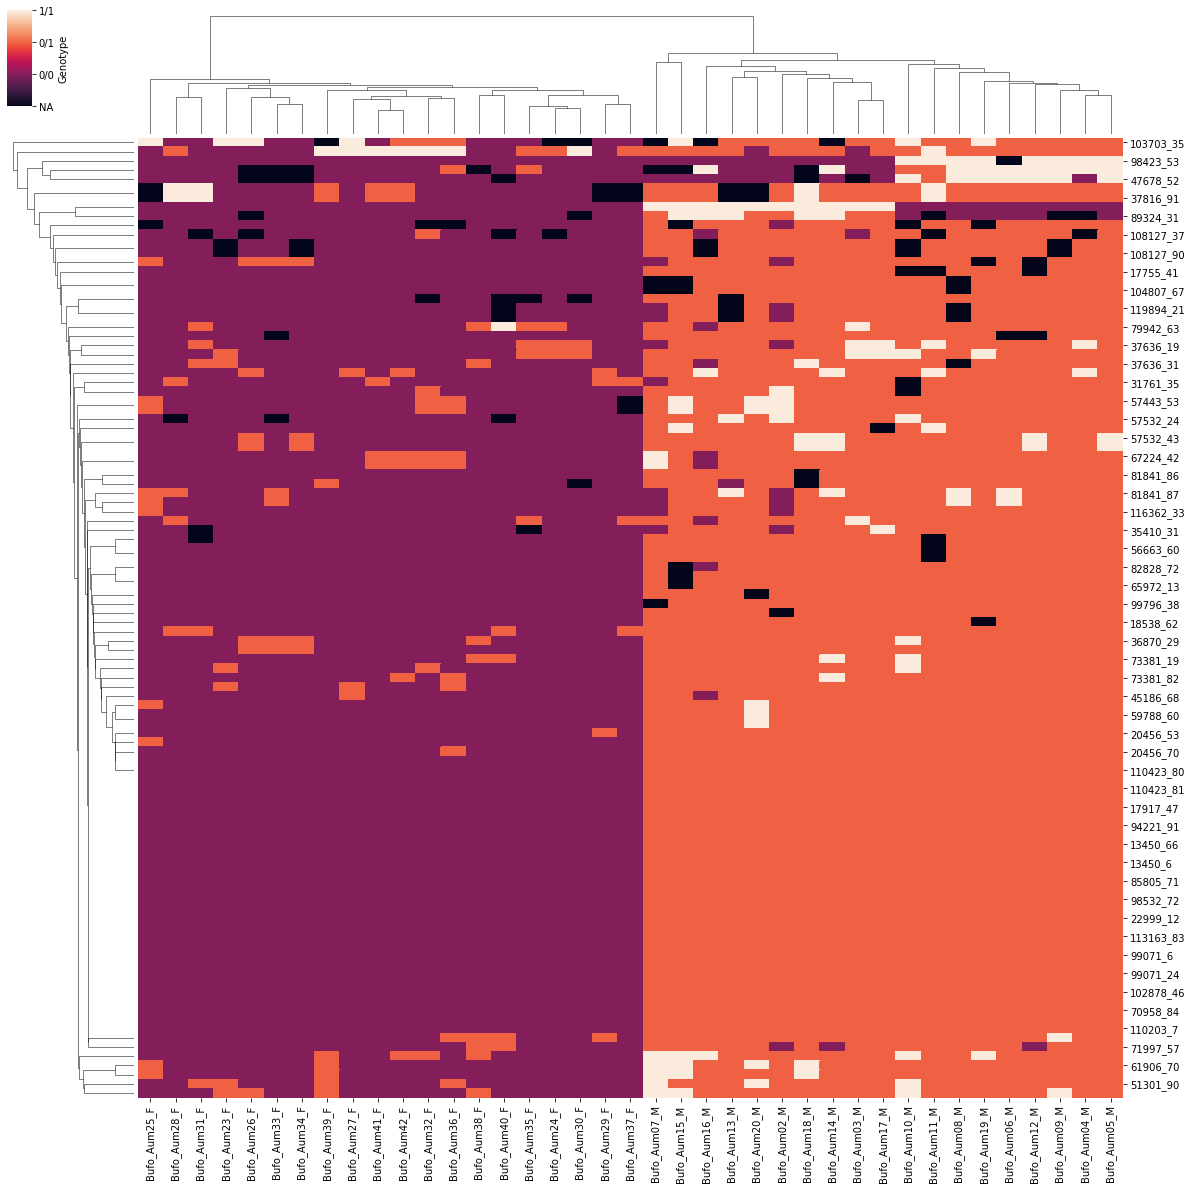

In [7]:
SL_outs = "/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults/Bspin_SLtags.vcf"
popmap = "/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults/Sex_ID_info.txt"
MISC3.Heatmap_from_VCF(SL_outs, popmap)

Looks pretty perfect to me! 

## Overlap with RadSex analyses

Finally, I would like to know what the overlap looks like between the SLM finder analysis and the RadSex results. As RadSex does not use processed data (i.e. it has not gone through locus assembly, SNP calling etc. in Stacks), the only way to do this is to blast markers between the two. 

So I will take the coverage table output (which contains all unique reads in a dataset along with the RadSex IDs), construct a blast database from this, and then align all the SLM tags to this. 


In [5]:
help(MISC2.fasta_maka)

Help on function fasta_maka in module MISC_RAD_tools_py2:

fasta_maka(whitey, cat, out=None)
    whitey = whitelist (either a python list or a file path) containing locus IDs in the form of "<Tag_ID>_<Position>"
    cat    = path to the catalog file to get sequences from



In [8]:
## 1. Make fasta for the SLM markers

import MISC_RAD_tools_py2 as MISC2

## Get IDs of the sex linked markers from file

SL_vcf = open("/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults/Bspin_SLtags.vcf", 'r').readlines()

tag_IDs = []

for line in SL_vcf:
    if not line.startswith("#"):
        tag_ID = line.split()[2]
        tag_IDs.append(tag_ID)
        
cat_path = "/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults/batch_1.catalog.tags.tsv.gz"
MISC2.fasta_maka(tag_IDs, cat_path)

Number of markers in whitelist: 104
88 sequences written to /home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults/Whitelist_tags.fa


Note the difference between 104 to 88 comes from the fact that several tags have multiple SNPs in them. 

I aligned this fasta to a blastdb that I made from the RadSex coverage table (containing all retained unique sequences). Below I examine those results. Note that the catalog RADtag sequences are consensuses based potentially on the merging of alleles in individuals. Thus there may be mismatches between that and the RadSex sequences. There may also be multiple alleles per RADtag. So I will 
work backwards from the significantly sex linked RadSex sequences. For each one I will check if it is included in the blast results and if the evalue is sufficiently high. 




In [25]:
Radsex_signif_seqs = open("/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults/SLM_RadSex_overlap/signif_seqs.fa", 'r').readlines()

Radsex_outs = []

for line in Radsex_signif_seqs:
    if line.startswith(">"):
        Radsex_outs.append(line.split("_")[0].split(">")[1])
    

In [28]:
blastouts = open("/home/djeffrie/Data/Dufresnes_bufonids/Bspinosus_adults/SLM_RadSex_overlap/SLtag_alignments.out", 'r').readlines()

blastouts_dict = {}

count = 0

for line in blastouts:
    Stacks_ID = line.split()[0]
    RadSex_ID = line.split()[1]
    evalue = line.split()[10]
    
    if RadSex_ID in Radsex_outs:
        print Stacks_ID, RadSex_ID, evalue
        count += 1
print count

404 24677966 2.24e-38
9662 15213245 2.24e-38
15942 12812455 4.81e-40
17917 12960297 4.81e-40
18310 13685604 4.81e-40
20124 10283613 4.81e-40
20456 8321116 2.24e-38
25398 9958290 4.81e-40
27815 12324345 4.81e-40
35088 10376156 2.24e-38
35410 23460097 2.24e-38
36870 10485090 4.81e-40
37543 9861780 4.81e-40
38195 4718042 1.34e-40
45186 13682295 4.81e-40
47125 11842629 4.81e-40
51301 10423073 1.03e-41
54290 11537699 4.81e-40
57532 23154923 2.24e-38
58190 11927059 4.81e-40
59788 16116820 1.03e-41
61906 7925779 4.81e-40
63271 15232523 4.81e-40
64299 10982335 4.81e-40
67778 13007761 1.03e-41
71997 10189193 4.81e-40
72233 10811686 4.81e-40
85917 13858280 4.81e-40
85939 7625147 2.24e-38
86525 13486501 2.24e-38
87558 15663395 4.81e-40
88852 9478276 4.81e-40
94221 5619021 6.23e-39
94296 9405102 2.24e-38
95666 17281892 1.03e-41
99071 16892885 2.24e-38
101428 11997198 2.24e-38
102125 12098370 4.81e-40
102878 5767410 2.24e-38
106091 10869453 4.81e-40
108127 17990256 1.05e-31
113949 7245471 4.81e-40


In [15]:
filtered_blastouts

{'101428': {'RadSex_seqs': ['17907006'], 'evalue': '1.03e-41'},
 '102125': {'RadSex_seqs': ['10191933'], 'evalue': '1.03e-41'},
 '102878': {'RadSex_seqs': ['9954307'], 'evalue': '1.03e-41'},
 '103703': {'RadSex_seqs': ['8508299'], 'evalue': '1.03e-41'},
 '104807': {'RadSex_seqs': ['11526444'], 'evalue': '1.03e-41'},
 '106091': {'RadSex_seqs': ['12748238'], 'evalue': '1.03e-41'},
 '108127': {'RadSex_seqs': ['14356834'], 'evalue': '1.03e-41'},
 '110162': {'RadSex_seqs': ['11298240'], 'evalue': '1.03e-41'},
 '110203': {'RadSex_seqs': ['9954636'], 'evalue': '1.03e-41'},
 '110423': {'RadSex_seqs': ['14010796'], 'evalue': '1.03e-41'},
 '112262': {'RadSex_seqs': ['16174040'], 'evalue': '1.03e-41'},
 '113163': {'RadSex_seqs': ['11341080'], 'evalue': '1.03e-41'},
 '113949': {'RadSex_seqs': ['15746466'], 'evalue': '1.03e-41'},
 '114079': {'RadSex_seqs': ['10335906'], 'evalue': '1.03e-41'},
 '115593': {'RadSex_seqs': ['13477064'], 'evalue': '1.03e-41'},
 '116362': {'RadSex_seqs': ['13384190'], 'e